# Marketing Campaign Performance Insights

# Project Overview

In the highly competitive landscape of digital marketing, effectively evaluating the success of
various marketing campaigns is essential for optimizing return on investment (ROI) and
improving overall performance. Despite having extensive data on multiple campaigns, there
is a need for a thorough analysis to assess and compare key metrics such as conversion
rates, acquisition costs, and ROI across different campaign types, channels, and audience
segments. This project aims to uncover actionable insights by examining temporal trends,
geographical influences, and audience responses to identify factors driving campaign
success and provide recommendations for enhancing future marketing strategies.

In [1]:
# Import packages
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
data = pd.read_csv(url)

# Initial overview
print(data.head())
print(data.info())
print(data.describe())


   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1             TechCorp         Email     Women 25-34  30 days   
1            2  Innovate Industries    Influencer     Women 35-44  45 days   
2            3       NexGen Systems  Social Media     Women 25-34  45 days   
3            4  Innovate Industries         Email     Women 25-34  45 days   
4            5  Data Tech Solutions    Influencer       Men 25-34  30 days   

  Channel_Used  Conversion_Rate  Acquisition_Cost     ROI          Location  \
0     Facebook         5.294194              9344   62.94           Houston   
1   Google Ads         3.326375              8783   10.67  Washington, D.C.   
2    Instagram         4.056375              9111   73.20             Miami   
3    Instagram         4.496375              7420   60.92           Seattle   
4   Google Ads         4.405930              2146  138.82           Chicago   

  Language  Clicks  Impressions  Engagement_Score  Custo

# Descriptive Analysis

In [2]:
# Basic Structure
print(f"Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}")
print(data.isnull().sum())  # Check for missing values
# Unique values
print(f"Unique Campaign IDs: {data['Campaign_ID'].nunique()}")
print(f"Locations: {data['Location'].unique()}")
print(f"Customer Segments: {data['Customer_Segment'].unique()}")

# Frequency counts
print(data['Campaign_Type'].value_counts())
print(data['Channel_Used'].value_counts())

Number of rows: 22029, Number of columns: 16
Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64
Unique Campaign IDs: 22029
Locations: ['Houston' 'Washington, D.C.' 'Miami' 'Seattle' 'Chicago' 'Los Angeles'
 'Atlanta' 'Dallas' 'New York' 'San Francisco']
Customer Segments: ['Tech Enthusiasts' 'Foodies' 'Fashionistas' 'Outdoor Adventurers'
 'Health & Wellness']
Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64
Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64


Based on the above result, the dataset doesn't have *Missing Values*. Each has a *Unique values*. By using value count we can analyse the shape of the dataset.

# Exploratory Data Analysis and Visualization

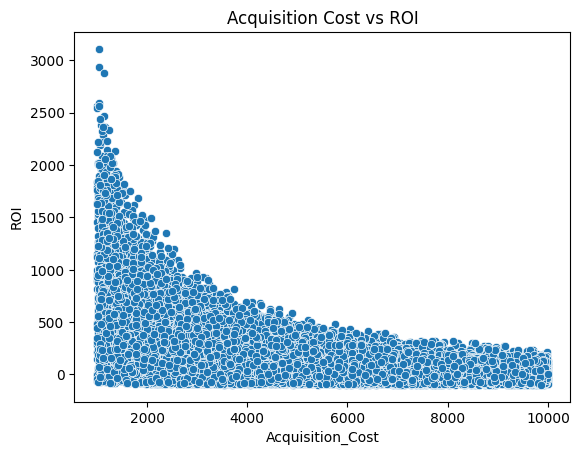

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relationship between Acquisition_Cost and ROI:
sns.scatterplot(x='Acquisition_Cost', y='ROI', data=data)
plt.title('Acquisition Cost vs ROI')
plt.show()

**Acquisition Cost vs. ROI (Scatter Plot)**

This scatter plot displays the relationship between acquisition cost and ROI (Return on Investment).
The trend indicates an inverse relationship: as acquisition cost increases, ROI tends to decrease.
Higher ROI values are observed for lower acquisition costs, suggesting diminishing returns at higher acquisition costs.
The dense clustering of points near lower acquisition costs indicates that most data points fall within this range.

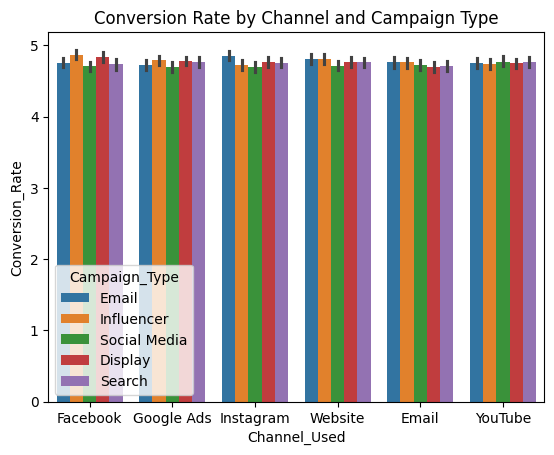

In [ ]:
# Average Conversion_Rate by Channel_Used and Campaign_Type:
sns.barplot(x='Channel_Used', y= 'Conversion_Rate', hue='Campaign_Type', data=data)
plt.title('Conversion Rate by Channel and Campaign Type')
plt.show()

**Conversion Rate by Channel and Campaign Type (Grouped Bar Chart)**

This grouped bar chart compares conversion rates across different channels (Facebook, Google Ads, Instagram, Website, Email, YouTube) for various campaign types.
Each color represents a different campaign type (Email, Influencer, Social Media, Display, and Search).
The bars appear close in height, suggesting that conversion rates do not vary significantly across channels for different campaign types.
The error bars on top of each bar might indicate standard deviation or confidence intervals.

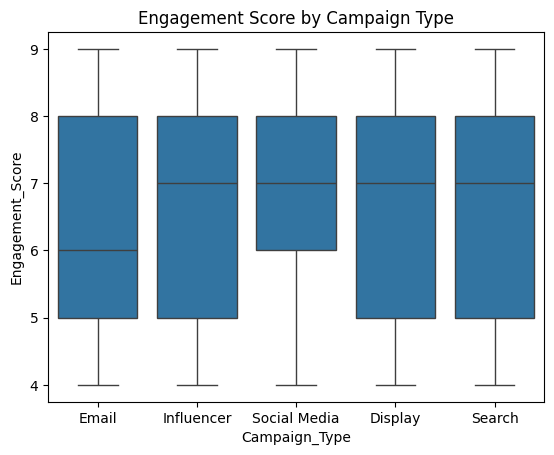

In [ ]:
# Distribution of Engagement_Score:
sns.boxplot(x= 'Campaign_Type', y= 'Engagement_Score', data=data)
plt.title('Engagement Score by Campaign Type')
plt.show()

**Engagement Score by Campaign Type (Box Plot)**

This box plot visualizes the engagement score distribution across different campaign types: Email, Influencer, Social Media, Display, and Search.
The central line in each box represents the median engagement score.
The spread of the box represents the interquartile range (IQR), showing the middle 50% of engagement scores.
The whiskers extend to indicate variability outside the IQR.
The plot shows that engagement scores are fairly consistent across campaign types, with minor variations.

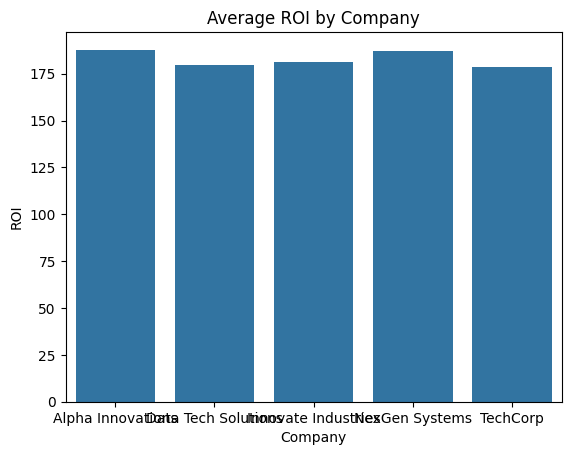

In [ ]:
# Average ROI by Company:
company_roi = data.groupby('Company')['ROI'].mean().reset_index()
sns.barplot(x='Company', y='ROI', data=company_roi)
plt.title('Average ROI by Company')
plt.show()

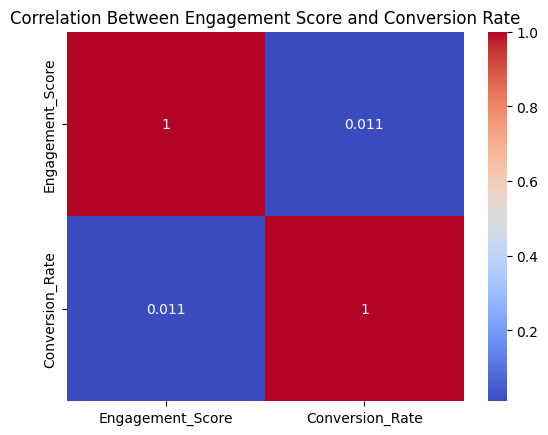

In [ ]:
# Correlation Heatmap
sns.heatmap(data[['Engagement_Score', 'Conversion_Rate']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Engagement Score and Conversion Rate')
plt.show()

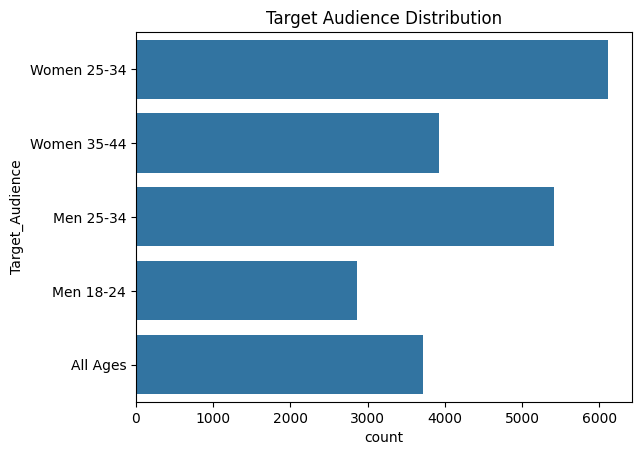

In [ ]:
# Customer segmentation
sns.countplot(y='Target_Audience', data=data)
plt.title('Target Audience Distribution')
plt.show()

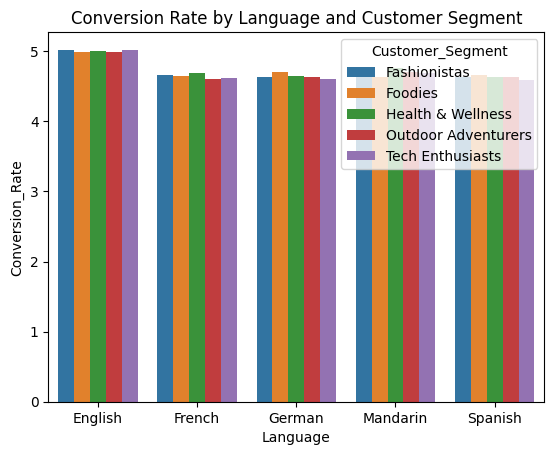

In [ ]:
# Highest Conversion_Rate for each language:
lang_conversion = data.groupby(['Language', 'Customer_Segment'])['Conversion_Rate'].mean().reset_index()
sns.barplot(x='Language', y='Conversion_Rate', hue='Customer_Segment', data=lang_conversion)
plt.title('Conversion Rate by Language and Customer Segment')
plt.show()

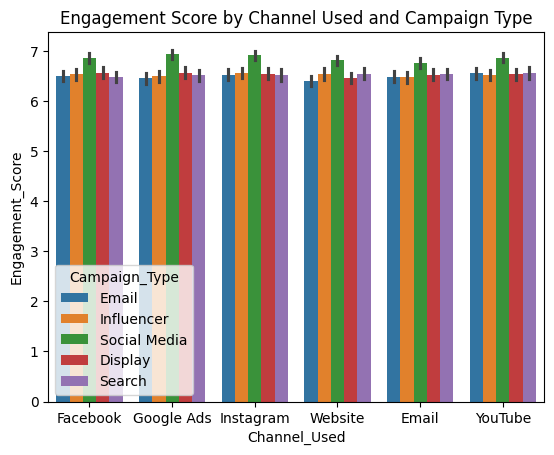

In [ ]:
# Channal Effectiveness
# Bar chart for Engagement_Score by Channel_Used:
sns.barplot(x='Channel_Used', y='Engagement_Score', hue='Campaign_Type', data=data)
plt.title('Engagement Score by Channel Used and Campaign Type')
plt.show()

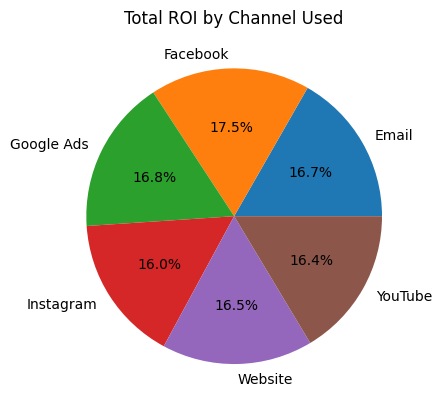

In [ ]:
# Pie chart for total ROI by Channel_Used:
roi_by_channel = data.groupby('Channel_Used')['ROI'].sum()
roi_by_channel.plot(kind='pie', autopct='%1.1f%%')
plt.title('Total ROI by Channel Used')
plt.ylabel('')
plt.show()

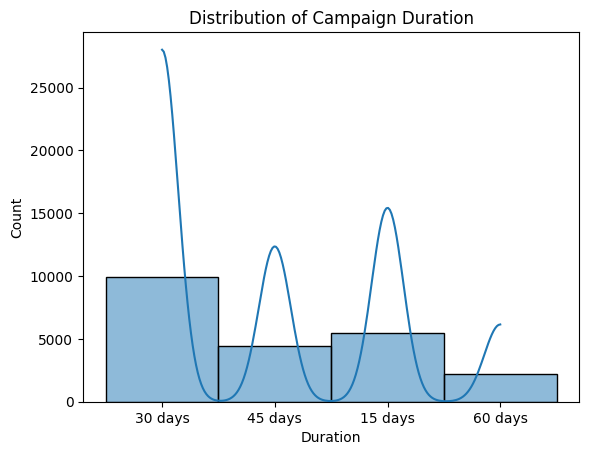

In [ ]:
# Time-Based Analysis
# Histogram for Duration:
sns.histplot(data['Duration'], bins=30, kde=True)
plt.title('Distribution of Campaign Duration')
plt.show()

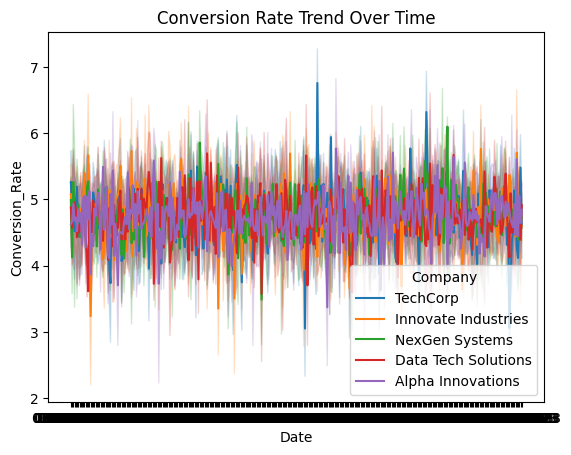

In [ ]:
# Trends in Conversion_Rate over time:
sns.lineplot(x='Date', y='Conversion_Rate', hue='Company', data=data)
plt.title('Conversion Rate Trend Over Time')
plt.show()

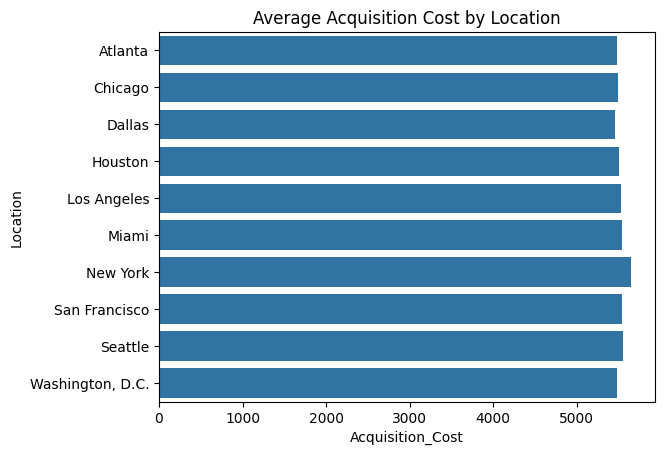

In [ ]:
# Geographic Analysis
# Highest Acquisition_Cost by location:
location_cost = data.groupby('Location')['Acquisition_Cost'].mean().reset_index()
sns.barplot(x='Acquisition_Cost', y='Location', data=location_cost)
plt.title('Average Acquisition Cost by Location')
plt.show()

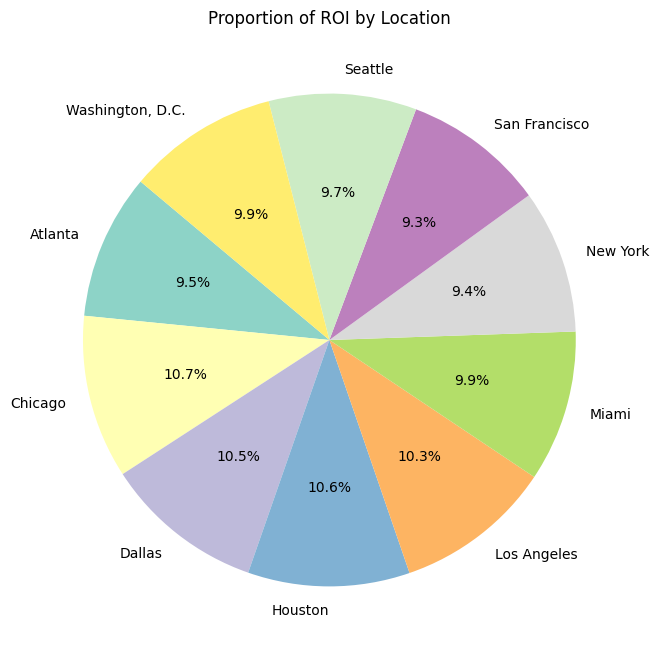

In [ ]:
import matplotlib.pyplot as plt

# Group ROI by Location
roi_by_location = data.groupby('Location')['ROI'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
roi_by_location.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')

# Add chart title
plt.title('Proportion of ROI by Location')
plt.ylabel('')  # Remove y-axis label
plt.show()

# Conclusion

1. Marketing Performance & ROI Analysis
Proportion of ROI by Location: Helps identify which cities yield the highest return on investment. Useful for regional marketing budget allocation.
Total ROI by Channel Used: Determines the most profitable marketing channels (Facebook, Google Ads, etc.), guiding investment decisions.
Average ROI by Company: Benchmarks company performance in terms of return on investment.

2. Customer Behavior & Segmentation
Conversion Rate by Language & Customer Segment: Helps tailor campaigns to different audience demographics and preferred languages.
Target Audience Distribution: Helps understand the gender and age distribution of the audience to improve personalized targeting.
Conversion Rate Trend Over Time: Tracks conversion rate changes to identify peak marketing periods and effectiveness of campaigns.

3. Campaign Effectiveness & Engagement
Engagement Score by Channel & Campaign Type: Evaluates the performance of different campaign strategies (social media, email, influencer, etc.).
Distribution of Campaign Duration: Helps determine the ideal campaign duration for maximum engagement and conversions.
Correlation Between Engagement Score & Conversion Rate: Analyzes the relationship between engagement and conversion rates to refine marketing strategies.

4. Cost & Budget Optimization
Average Acquisition Cost by Location: Helps determine where customer acquisition is most cost-effective, optimizing budget allocation.


**Overall Use Cases**

Business Decision-Making: Helps companies allocate budgets more effectively, select profitable channels, and refine marketing strategies.

Marketing Strategy Optimization: Enables marketers to fine-tune campaigns based on audience engagement, conversion trends, and regional ROI performance.

Competitor Benchmarking: Helps compare company performance in terms of ROI and conversion rates to industry standards.